# Tier 2. Module 2: Numerical Programming in Python

## Topic 2 - Matrix decompositions in linear algebra

## Homework

Using the SVD schedule for image compression. This approach may be useful in digital signal processing when preparing data for a machine learning model.

This will help to consolidate the following skills:
* Work with matrix display of images.
* Application of matrix docompositions.

### Task

#### 1. Prepare some images. These can be RGB or grayscale images, for example, in `jpg` format.


#### 2. Output the image using the `imread` function from the `matplotlib` library.


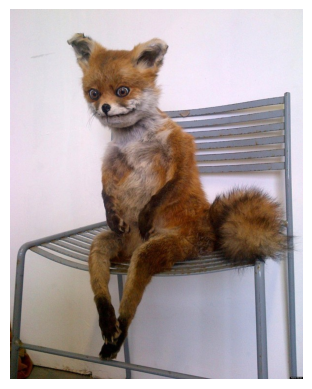

In [34]:
import matplotlib.pyplot as plt

image = plt.imread("src/fox.jpg")

plt.imshow(image)
plt.axis("off")
plt.show()

#### 3. Determine the size of the image using the `shape` function.


In [35]:
image.shape

(759, 600, 3)

#### 4. Prepare the image for SVD.


Since SVD can only be applied to 2D data, we can either do it for each color channel separately, or we can reshape the image from a 3D matrix to a 2D matrix by smoothing each color channel and stacking them horizontally (or vertically).

For example, the `reshape` function can be applied, which changes the shape of the image into a 2D matrix by stacking color channels horizontally.


In [36]:
if len(image.shape) > 2:
    height, width, channels = image.shape
    image = image.reshape(-1, width * channels)

image.shape

(759, 1800)

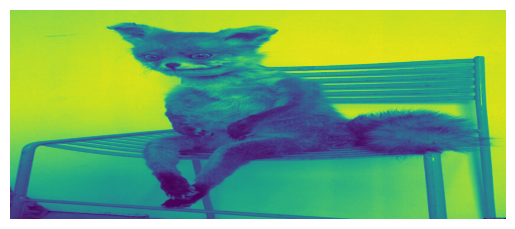

In [31]:
plt.imshow(image)
plt.axis("off")
plt.show()

#### 5. Apply SVD decomposition using the `svd` function from the `numpy` library.

In [37]:
import numpy as np

U, S, VT = np.linalg.svd(image, full_matrices=False)

print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)

U shape: (759, 759)
S shape: (759,)
VT shape: (759, 1800)


#### 6. Visualize the first `k` values of the matrix `Σ`.

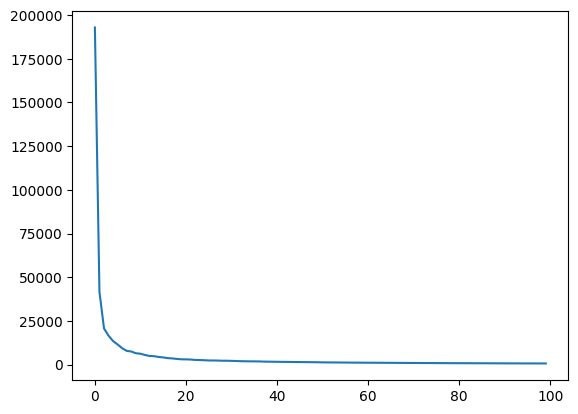

In [74]:
k=100
plt.plot(np.arange(k), S[:k])
plt.show()

#### 7. Compress the image according to the elbow criterion.

If there is a significant decrease in the values ​​of the eigenvalues ​​from the matrix Σ in the diagram, it will mean that we can effectively compress the image without significant loss of accuracy. In our case, the first 2 values ​​are the most informative (elbow on the feature matrix visualization), for compression we use the truncated SVD algorithm (`TruncatedSVD` function).

In [48]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
truncated_image = svd.fit_transform(image)
truncated_image.shape

(759, 2)

#### 8. Measure how much information was lost during compression.

To see how much information was lost during compression, we can measure the image reconstruction error. We will measure the reconstruction error as the mean squared errors (MSE) between the pixel values ​​of the original image and the reconstructed image.

In Scikit-Learn, the reconstructed image can be obtained by calling the `inverse_transform` method of the `TruncatedSVD` transformer.

In [49]:
reconstructed_image = svd.inverse_transform(truncated_image)

Calculation of the reconstruction error.

In [50]:
reconstruction_error = np.mean(np.square(reconstructed_image - image))
reconstruction_error

np.float64(1198.543672192492)

#### 9. Visualize the reconstructed image.

To visualize the reconstructed image, we first need to reshape it to its original 3D shape and then crop the pixel values ​​to integers in the range [0, 255].

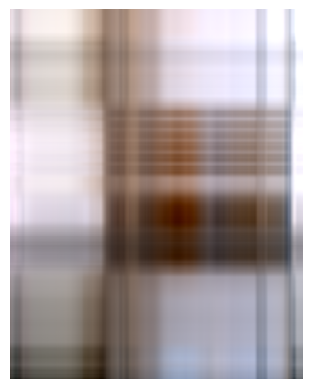

In [52]:
reconstructed_image = reconstructed_image.reshape(height, width, channels)
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype("uint8")

plt.imshow(reconstructed_image)
plt.axis("off")
plt.show()

#### Conclusion:
It is obvious that only two features, although they are the most informative, are not enough to reproduce an image of acceptable quality.

#### 10. Perform experiments using different values ​​of `k` - eigenvalues ​​from the matrix `Σ` and visualize the results.

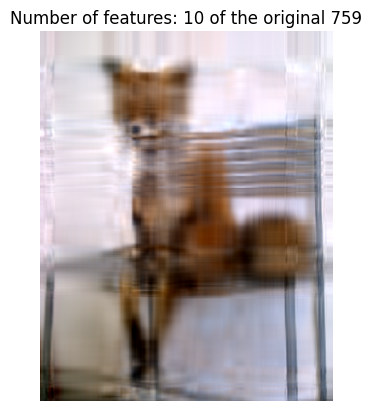

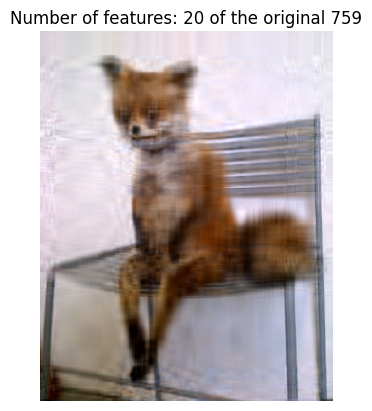

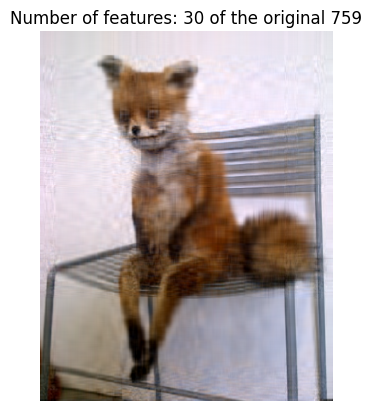

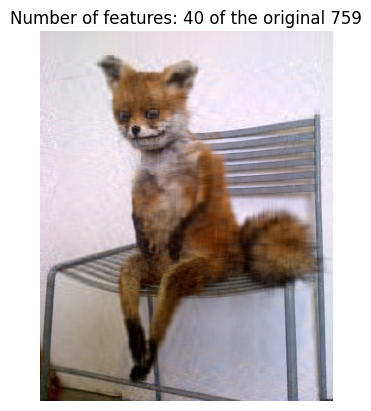

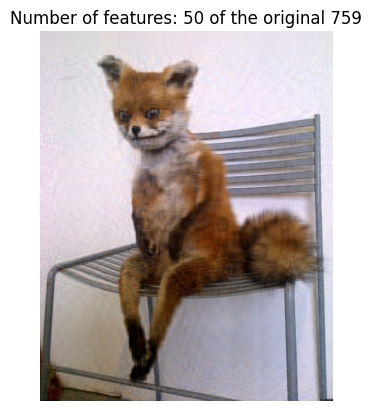

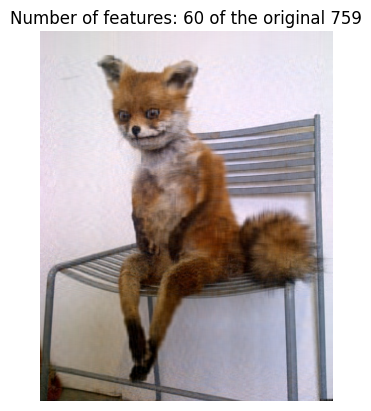

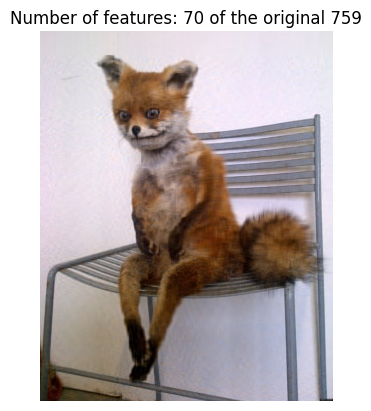

In [73]:
for i in (10, 20, 30, 40, 50, 60, 70):
    svd_new = TruncatedSVD(n_components=i)
    truncated_image_new = svd_new.fit_transform(image)
    reconstructed_image_new = svd_new.inverse_transform(truncated_image_new)
    reconstructed_image_new = reconstructed_image_new.reshape(height, width, channels)
    reconstructed_image_new = np.clip(reconstructed_image_new, 0, 255).astype("uint8")

    plt.imshow(reconstructed_image_new)
    plt.title(f"Number of features: {i} of the original {U.shape[0]}")
    plt.axis("off")
    plt.show()

#### Conclusion:
About 10% of the features from their initial number are needed so that the truncated image does not differ significantly from the original one.